# Air traffic delays



The goal of this notebook is to use exploratory data analysis to provide insights about the main factors affecting flight delays.

## Introduction

Air transport delays are a painful inconvenience for travelers, and they also induce large costs for passengers, airlines, and the economy of the countries. In the USA, every year around 20% of airline flights are delayed or cancelled (see figure below). A study of the U.S. Federal Aviation Administration (analyzed data from 2007) estimates that flight delays cost the airline industry \$8 billion a year, much of it due to increased spending on crews, fuel and maintenance. The cost for passengers is even higher, nearly \$17 billion. In addition to these direct costs, flight delays have indirect effects on the economy of the countries. The same study estimated that air transportation delays reduced the 2007 US gross domestic product (GDP) by $4 billion. The full report is available online at http://www.isr.umd.edu/NEXTOR/pubs/TDI_Report_Final_10_18_10_V3.pdf.

Based on the literature reviews, this type of problem is actively examined by many researchers and GE even brought out a challenge with an award of \$250,000 to the team who can most accurately predict flight delays.


These high costs have motivated the development of analysis and prediction methods for better air traffic delays management (Rebollo and Balakrishnan 2014). In 2014 General Electric (GE) even sponsored a challenge with an award of \$250,000 to the team who can most accurately predict flight delays (https://www.kaggle.com/c/flight2-final). 


## Dataset
Data used in this study are from the U.S. Department of Transportation. They can be downloaded from:
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time. 

The dataset used for this project includes details about flights in the US from January to December 2016. It includes the following variables: 

- Dates: day of week, date, month, year 
- Arrival and departure times: actual and scheduled 
- Flight times: actual and scheduled 
- Origin and destination: airport code, latitude, longitude 
- Carrier: American, Aloha Air, United, US Air, …

In [4]:
#Import all the necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [5]:
months = ['jan', 'fev','march','april','may','june','july','aug','sep','oct','nov','dec']

frames = []

for month in months:
    flights_month = pd.DataFrame.from_csv('data/' + month + '_2016.csv', index_col=None)
    
    #Add a column with the hour of the day
    flights_month.DEP_TIME = flights_month.DEP_TIME.fillna(0) #DEP_TIME = NaN for Cancelled flights
    dep_hour = (flights_month.DEP_TIME/ 100).astype(int) #Does not work if NaN values are not replaced (previous line)
    flights_month['DEP_HOUR'] = dep_hour
    flights_month['DEP_HOUR'].replace(24, 0, inplace=True)  #Replace 24 by 0 (equivalent times)
    
    frames.append(flights_month)
    
flights = pd.concat(frames)

C:\Users\alo\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
#Features
flights.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'AIRLINE_ID',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST',
       'DEST_CITY_NAME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_TIME',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 29', 'DEP_HOUR'],
      dtype='object')

## Delay duration

We will use a histogram to show the distribution of the duration of delays (in minutes) on the entire dataset. 
Departure and arrival delays are analyzed separately.

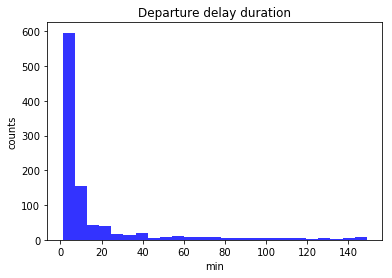

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

#x = np.random.normal(0,1,1000)
x = flights[flights.DEP_DEL15==1].DEP_DELAY_NEW.value_counts()
x = x[x < 150]
numBins = 25
ax.hist(x,numBins,color='blue',alpha=0.8)
plt.xlabel('min')
plt.ylabel('counts')
plt.title('Departure delay duration')
plt.show()

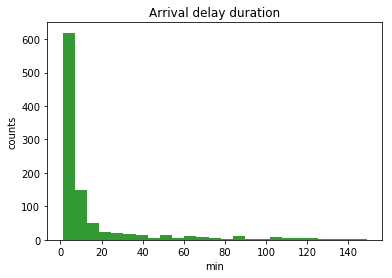

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = flights[flights.ARR_DEL15==1].ARR_DELAY_NEW.value_counts()
y = y[y < 150]
numBins = 25
ax.hist(y,numBins,color='green',alpha=0.8)
plt.xlabel('min')
plt.ylabel('counts')
plt.title('Arrival delay duration')
plt.show()

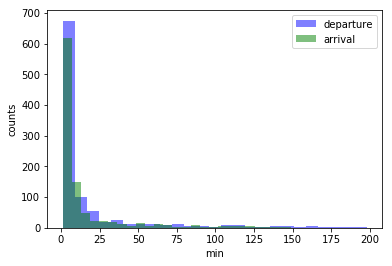

In [12]:
#Overlay both histograms for comparison 

x = flights[flights.DEP_DEL15==1].DEP_DELAY_NEW.value_counts()
x = x[x < 200]

y = flights[flights.ARR_DEL15==1].ARR_DELAY_NEW.value_counts()
y = y[y < 150]

numBins = 25


plt.hist(x, numBins, color='blue', alpha=0.5, label='departure')
plt.hist(y, numBins, color='green', alpha=0.5, label='arrival')

plt.legend(loc='upper right')
plt.xlabel('min')
plt.ylabel('counts')
plt.show()

# Impact of month of flight on the delays

We will consider the impact of the month of flight on the delays. 
A bar graph with the mean departure and arrival delay in minutes plotted by month is the an effective way to see the potential effects of month.

### Number of delayed flights by month

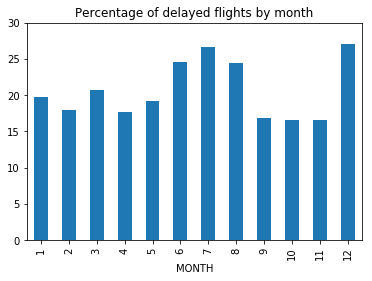

In [27]:
#In this figure departure and arrival delays are analyzed together
delayed_flights = flights[(flights.DEP_DEL15==1) | (flights.ARR_DEL15==1)]
nof_delayed_flights = delayed_flights.groupby(delayed_flights.MONTH).size()
nof_total_flights = flights.groupby(flights.MONTH).size()
percentage_delayed_flights = 100* nof_delayed_flights/nof_total_flights
percentage_delayed_flights.plot(kind='bar', title='Percentage of delayed flights by month',ylim=[0, 30])

**Similar patterns for deperture and arrival delays**

In [35]:
#Percentage of arrival delayed flights
delayed_departure_flights = flights[flights.ARR_DEL15==1]
nof_delayed_departure_flights = delayed_departure_flights.groupby(delayed_departure_flights.MONTH).size()
percentage_delayed_departure_flights = 100* nof_delayed_departure_flights/nof_total_flights
#percentage_delayed_departure_flights.plot(kind='bar', title='Percentage of arrival delayed flights by month',ylim=[0, 30])

In [36]:
#Percentage of arrival delayed flights
delayed_arrival_flights = flights[flights.ARR_DEL15==1]
nof_delayed_arrival_flights = arrival_dep_flights.groupby(delayed_arrival_flights.MONTH).size()
percentage_delayed_arrival_flights = 100* nof_delayed_arrival_flights/nof_total_flights
#percentage_delayed_arrival_flights.plot(kind='bar', title='Percentage of arrival delayed flights by month',ylim=[0, 30])

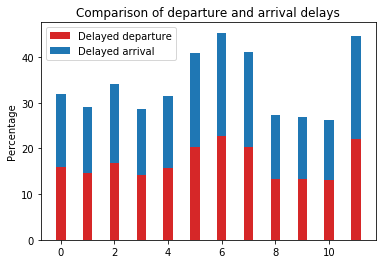

In [37]:
N = 12 #Number of months

ind = np.arange(N)    # the x locations for the bars
width = 0.35          # the width of the bars

p1 = plt.bar(ind, percentage_delayed_dep_flights, width, color='#d62728')
p2 = plt.bar(ind, percentage_delayed_arrival_flights, width,bottom=percentage_delayed_dep_flights)

plt.ylabel('Percentage')
plt.title('Comparison of departure and arrival delays')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Delayed departure', 'Delayed arrival'))

plt.show()

### Delay duration by month

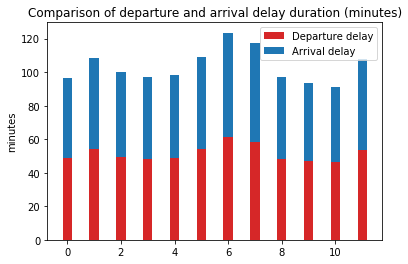

In [43]:
delayed_flights = flights[(flights.DEP_DEL15==1) | (flights.ARR_DEL15==1)]
mean_delayed_flights = delayed_flights.groupby(delayed_flights.MONTH).mean()
mean_departure_delay = mean_delayed_flights.DEP_DELAY_NEW
mean_arrival_delay = mean_delayed_flights.ARR_DELAY_NEW

N = 12 #Number of months

ind = np.arange(N)    # the x locations for the bars
width = 0.35          # the width of the bars

p1 = plt.bar(ind, mean_departure_delay, width, color='#d62728')
p2 = plt.bar(ind, mean_arrival_delay, width,bottom=mean_departure_delay)

plt.ylabel('minutes')
plt.title('Comparison of departure and arrival delay duration (minutes)')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Departure delay', 'Arrival delay'))

plt.show()

**The distribution of ocurrences and duration is similar for departure and arrival delays.**

We could guess that most of the flights suffering arrival delay may be caused by a delay in their departure.
The figure below confirms this hypothesis.

In [48]:
#Departure delay of non delay arrival flights

delayed_arrival_flights = flights[flights.ARR_DEL15==1]
delayed_arrival_flights = delayed_arrival_flights.groupby(delayed_arrival_flights.MONTH).size()

delayed_arrival_flights_delayed_departure = flights[(flights.ARR_DEL15==1) & (flights.DEP_DEL15==1)]
delayed_arrival_flights_delayed_departure = delayed_arrival_flights_delayed_departure.groupby(delayed_arrival_flights_delayed_departure.MONTH).size()


delayed_arrival_flights_non_delayed_departure = flights[(flights.ARR_DEL15==1) & (flights.DEP_DEL15==0)]
delayed_arrival_flights_non_delayed_departure = delayed_arrival_flights_non_delayed_departure.groupby(delayed_arrival_flights_non_delayed_departure.MONTH).size()

percentage1 = 100*delayed_arrival_flights_delayed_departure/delayed_arrival_flights
#percentage2 = 100*delayed_arrival_flights_non_delayed_departure/delayed_arrival_flights

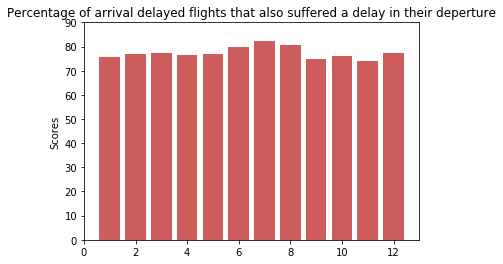

In [51]:
N = 12

ind = np.arange(1,13)    # the x locations for the bars
width = 0.35             # the width of the bars

plt.bar(ind, percentage1, color='indianred')


plt.ylabel('Scores')
plt.title('Percentage of arrival delayed flights that also suffered a delay in their deperture')
plt.ylim([0, 90])
plt.show()

**There is a correlation between arrival delay and departure delay**

# Day of month

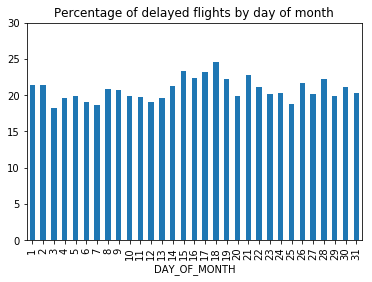

In [69]:
nof_delayed_flights = delayed_flights.groupby(delayed_flights.DAY_OF_MONTH).size()
nof_total_flights = flights.groupby(flights.DAY_OF_MONTH).size()
percentage_delayed_flights = 100* nof_delayed_flights/nof_total_flights
percentage_delayed_flights.plot(kind='bar', title='Percentage of delayed flights by day of month',ylim=[0, 30])

Flight delays remain quite stable along the month. However, there is a slight increase of delays around the mid of the month.

# Day of week

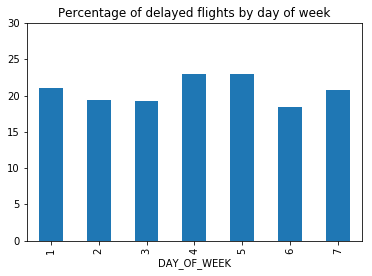

In [138]:
nof_delayed_flights = delayed_flights.groupby(delayed_flights.DAY_OF_WEEK).size()
nof_total_flights = flights.groupby(flights.DAY_OF_WEEK).size()
percentage_delayed_flights = 100* nof_delayed_flights/nof_total_flights
percentage_delayed_flights.plot(kind='bar', title='Percentage of delayed flights by day of week',ylim=[0, 30])

The worst days in terms of delays are Thursday and Friday, while there are no big differences for the rest of the week days.

# Hour of day

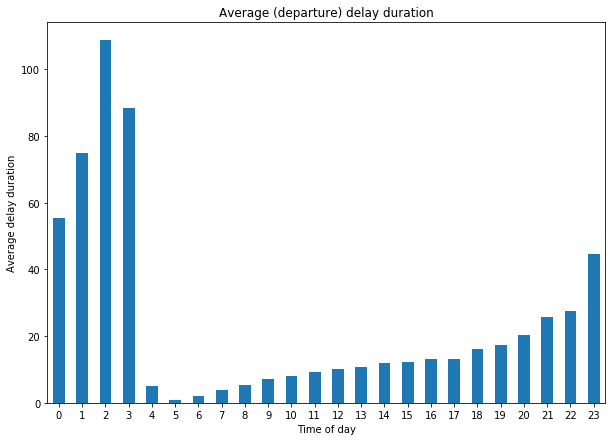

In [79]:
#Delayed flights = departure delayed flights
delayed_flights = flights[flights.DEP_DEL15==1]
mean_values_by_dep_time = flights.groupby(flights.DEP_HOUR).mean()
mean_delay_duration = mean_values_by_dep_time.DEP_DELAY_NEW
#mean_delay_duration.plot(kind='bar')
#mean_delay_duration

ax = mean_delay_duration.plot(kind='bar',figsize=(10,7), rot=0, title='Average (departure) delay duration')
ax.set_ylabel("Average delay duration")
ax.set_xlabel("Time of day")
#patches, labels = ax.get_legend_handles_labels()
#ax.legend(patches, labels, loc='best')

**Late night fligts have higher average departure delay duration**

# Cause of delay

Are different causes depending on the month?
Are departure and arrival delays caused by the same factors?

## Departure delays

C:\Users\alo\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


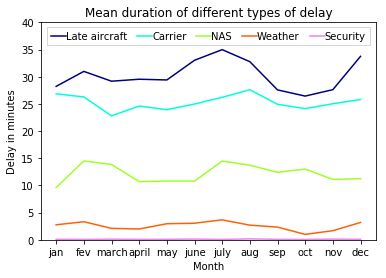

In [71]:
departure_delayed_flights = flights[(flights.DEP_DEL15==1)]
mean_df = departure_delayed_flights.groupby(departure_delayed_flights.MONTH).mean()

weather_delay = mean_df.WEATHER_DELAY
nas_delay = mean_df.NAS_DELAY
late_aircraft_delay = mean_df.LATE_AIRCRAFT_DELAY
security_delay = mean_df.SECURITY_DELAY
carrier_delay = mean_df.CARRIER_DELAY


num_plots = 5


colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

# Plot several different functions...

labels = []
#for i in range(1, num_plots + 1):
    #plt.plot(x, i * x + 5 * i)
    #labels.append(r'$y = %ix + %i$' % (i, 5*i))
    
plt.plot(late_aircraft_delay)
labels.append('Late aircraft')
plt.plot(carrier_delay)
labels.append('Carrier')
plt.plot(nas_delay)
labels.append('NAS')
plt.plot(weather_delay)
labels.append('Weather')
plt.plot(security_delay)
labels.append('Security')


plt.legend(labels, ncol=5, loc='upper center', 
           bbox_to_anchor=[0.5, 1.0], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=False, shadow=False)
#plt.legend(labels,loc='upper right')
plt.ylabel('Delay in minutes')
plt.xlabel('Month')
plt.xticks(np.arange(1,13),('jan', 'fev','march','april','may','june','july','aug','sep','oct','nov','dec'))
plt.title('Mean duration of different types of delay')
plt.ylim([0,40])
plt.show()

## Arrival delays (on-time departure)

C:\Users\alo\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


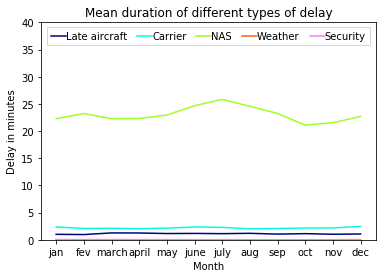

In [72]:
arrival_delayed_flights = flights[(flights.DEP_DEL15==0) & (flights.DEP_DEL15==0)]
mean_df = arrival_delayed_flights.groupby(arrival_delayed_flights.MONTH).mean()

weather_delay = mean_df.WEATHER_DELAY
nas_delay = mean_df.NAS_DELAY
late_aircraft_delay = mean_df.LATE_AIRCRAFT_DELAY
security_delay = mean_df.SECURITY_DELAY
carrier_delay = mean_df.CARRIER_DELAY


num_plots = 5


colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

# Plot several different functions...

labels = []
#for i in range(1, num_plots + 1):
    #plt.plot(x, i * x + 5 * i)
    #labels.append(r'$y = %ix + %i$' % (i, 5*i))
    
plt.plot(late_aircraft_delay)
labels.append('Late aircraft')
plt.plot(carrier_delay)
labels.append('Carrier')
plt.plot(nas_delay)
labels.append('NAS')
plt.plot(weather_delay)
labels.append('Weather')
plt.plot(security_delay)
labels.append('Security')


plt.legend(labels, ncol=5, loc='upper center', 
           bbox_to_anchor=[0.5, 1.0], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=False, shadow=False)
#plt.legend(labels, loc='upper right')
plt.ylabel('Delay in minutes')
plt.xlabel('Month')
plt.xticks(np.arange(1,13),('jan', 'fev','march','april','may','june','july','aug','sep','oct','nov','dec'))
plt.title('Mean duration of different types of delay')
plt.ylim([0,40])
plt.show()

**The causes of delay remain stable along the year. However, we can see a difference of the main causes for departure and arrival delays. The main cause of departure delay is the late arrival of the aircraft, while the main cause for arrival delays is a NAS delay.**

**Another interesting fact that we can observe from the previous figures is that the mean delay duration due to weather conditions is higher for july than for winter months. We are going to see if the number of flights delayed due to weather conditions is also hiher during the summer.**

In [73]:
flights.WEATHER_DELAY.fillna(0, inplace=True)

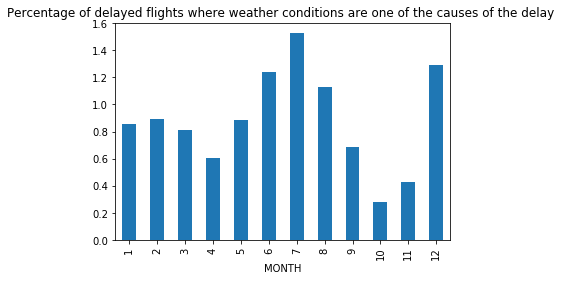

In [74]:
delayed_flights = flights[(flights.DEP_DEL15==1) | (flights.ARR_DEL15==1)]
weather_delayed_flights = delayed_flights[delayed_flights.WEATHER_DELAY > 0]
other_causes_delayed_flights = delayed_flights[delayed_flights.WEATHER_DELAY  == 0]
#weather_delayed_flights.groupby(weather_delayed_flights.MONTH).size().plot(kind='bar')

weather_num = weather_delayed_flights.groupby(weather_delayed_flights.MONTH).size()
den = flights.groupby(flights.MONTH).size()

weather_percentage = 100*weather_num/den
weather_percentage.plot(kind='bar', title='Percentage of delayed flights where weather conditions are one of the causes of the delay ')


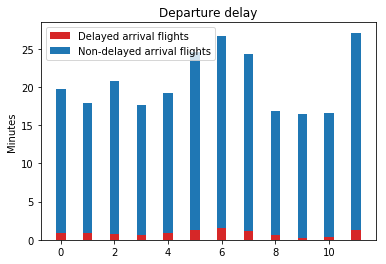

In [75]:
others_num = other_causes_delayed_flights.groupby(other_causes_delayed_flights.MONTH).size()
others_percentage = 100*others_num/den

N = 12

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, weather_percentage, width, color='#d62728')
p2 = plt.bar(ind, others_percentage, width,bottom=weather_percentage)

plt.ylabel('Minutes')
plt.title('Departure delay')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Delayed arrival flights', 'Non-delayed arrival flights'))

plt.show()


**In this plot we can clearly seen that weather factor have a low impact on airlaine delays. However, we can also notice that, surprisingly, there are more flights delays in summer (july) than in the winter season!!**

# Airline

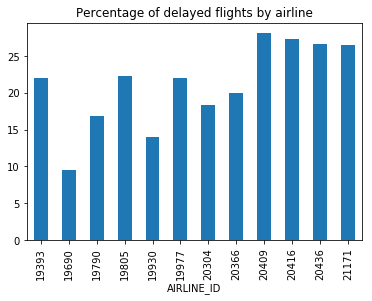

In [86]:
#Percentage of delayed flights by airline
#delayed_flights = flights[(flights.DEP_DEL15==1) | (flights.ARR_DEL15 ==1)]

num = delayed_flights.groupby(delayed_flights.AIRLINE_ID).size()
num

den = flights.groupby(flights.AIRLINE_ID).size()
den

percentage_delayed_flights = (100*num /den)
    
percentage_delayed_flights.plot(kind = 'bar', title='Percentage of delayed flights by airline')

# Destination

In [131]:
len(flights)

5617658

C:\Users\alo\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


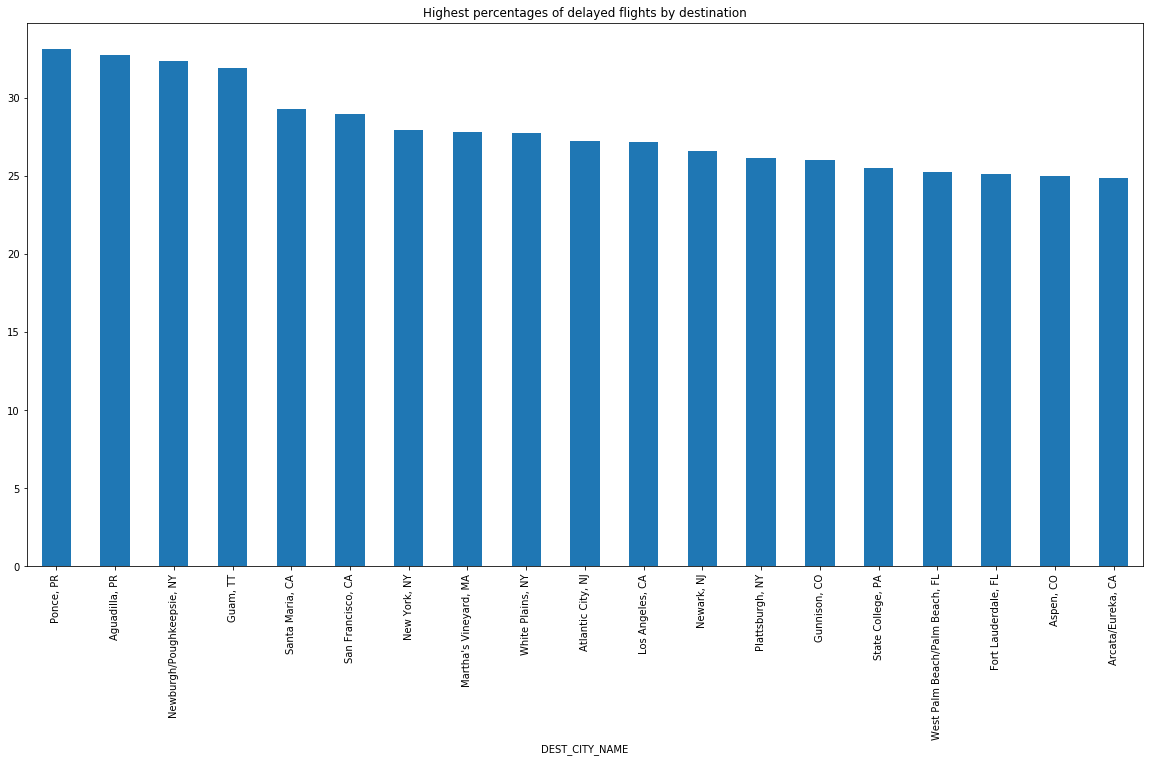

In [132]:
#Percentage of delayed flights by destination
#delayed_flights = flights[(flights.DEP_DEL15==1) | (flights.ARR_DEL15 ==1)]

num = delayed_flights.groupby(delayed_flights.DEST_CITY_NAME).size()

den = flights.groupby(flights.DEST_CITY_NAME).size()

percentage_delayed_flights = (100*num /den)

percentage_delayed_flights.sort(ascending=False)

highest_percentage_delayed_flights = percentage_delayed_flights[1:20]

      
plt.figure(figsize=(20,10))
highest_percentage_delayed_flights.plot(kind = 'bar', title='Highest percentages of delayed flights by destination')




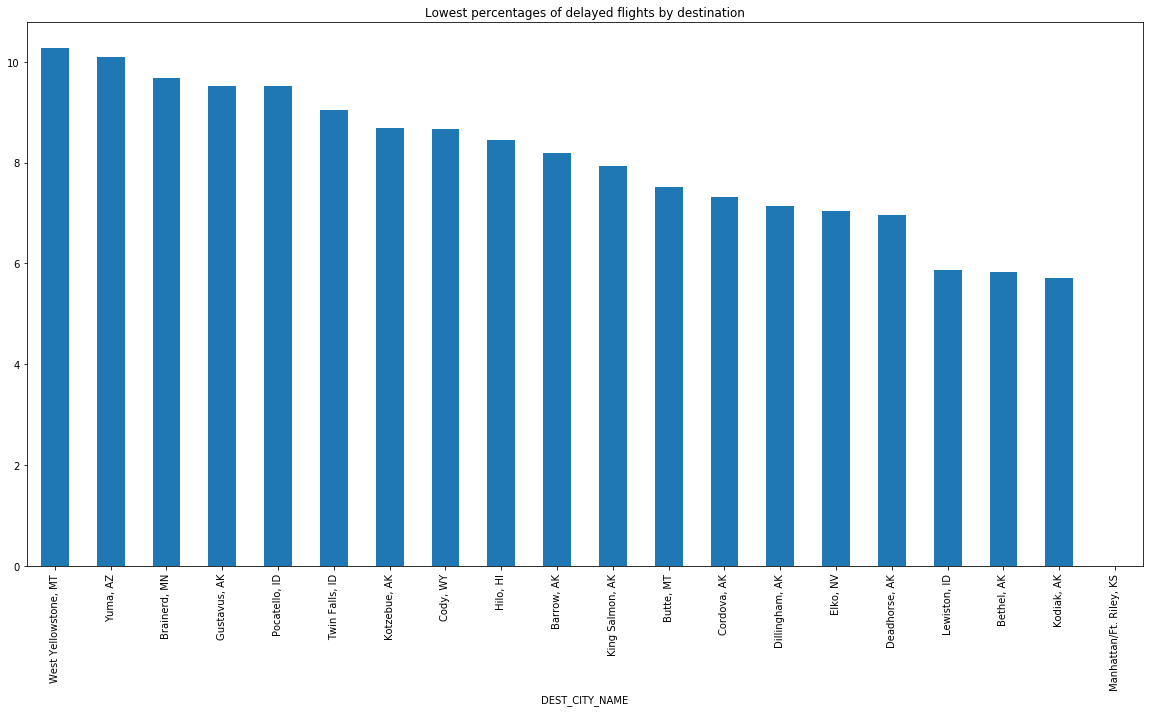

In [133]:
lowest_percentage_delayed_flights = percentage_delayed_flights[len(percentage_delayed_flights)-21:len(percentage_delayed_flights)-1]
 
plt.figure(figsize=(20,10))
lowest_percentage_delayed_flights.plot(kind = 'bar', title='Lowest percentages of delayed flights by destination')


# Destination and month

C:\Users\alo\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


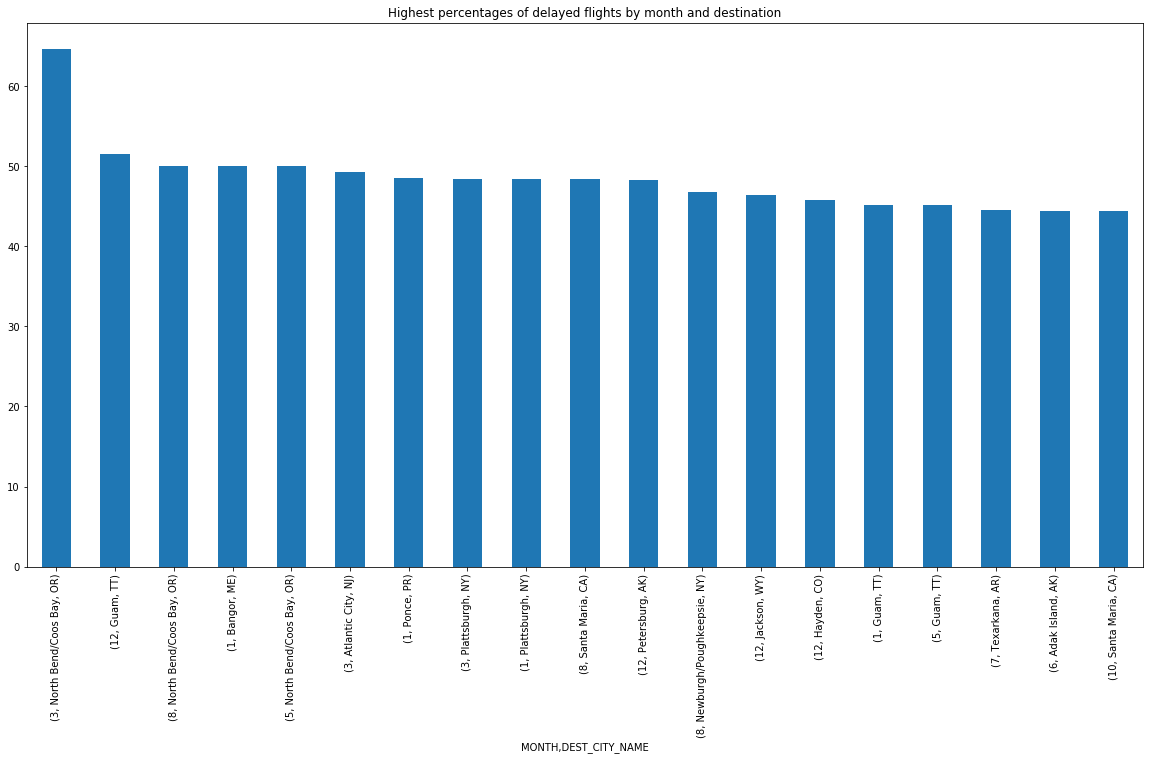

In [137]:
#Percentage of delayed flights by destination
#delayed_flights = flights[(flights.DEP_DEL15==1) | (flights.ARR_DEL15 ==1)]

num = delayed_flights.groupby([delayed_flights.MONTH,delayed_flights.DEST_CITY_NAME]).size()

den = flights.groupby([flights.MONTH,flights.DEST_CITY_NAME]).size()

percentage_delayed_flights = (100*num /den)

percentage_delayed_flights.sort(ascending=False)

highest_percentage_delayed_flights = percentage_delayed_flights[1:20]

      
plt.figure(figsize=(20,10))
highest_percentage_delayed_flights.plot(kind = 'bar', title='Highest percentages of delayed flights by month and destination')


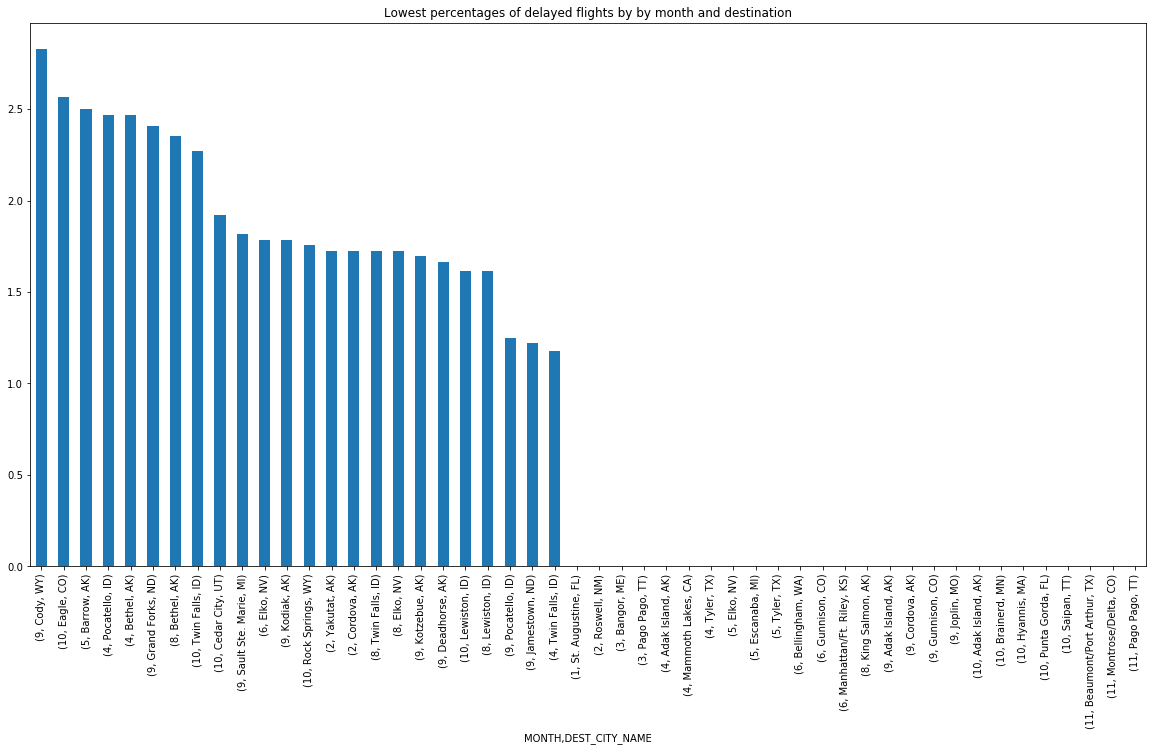

In [136]:
lowest_percentage_delayed_flights = percentage_delayed_flights[len(percentage_delayed_flights)-51:len(percentage_delayed_flights)-1]
       
plt.figure(figsize=(20,10))
lowest_percentage_delayed_flights.plot(kind = 'bar', title='Lowest percentages of delayed flights by by month and destination')

